# Import dependencies

In [1]:
import tensorflow as tf
import pandas as pd
from keras import backend as K
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
import cv2
import dlib
import imageio
from typing import List

In [2]:
import os
import random

In [4]:
from utils.loading import *
from utils.pipeline import *

# GPU setup

In [5]:
gpus = tf.config.list_physical_devices('GPU')
try:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
except:
    pass
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Data loading

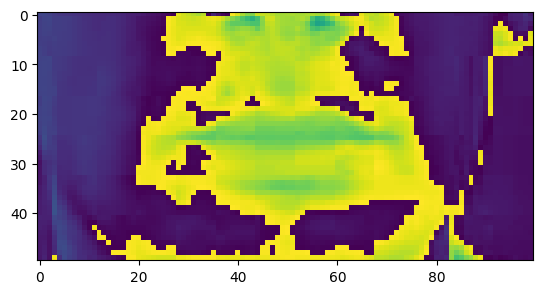

In [6]:
plt.imshow(load_video('.\\data\\s1\\bbal6n.mpg')[0].numpy())

In [7]:
load_alignments('.\\data\\alignments\\s1\\bbal6n.align')

<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39, 12, 39, 19,  9, 24,
       39, 14, 15, 23], dtype=int64)>

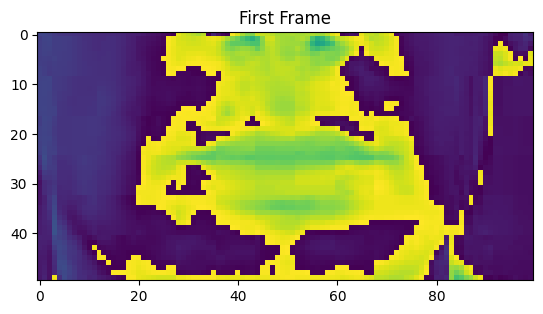

No of frames: 75


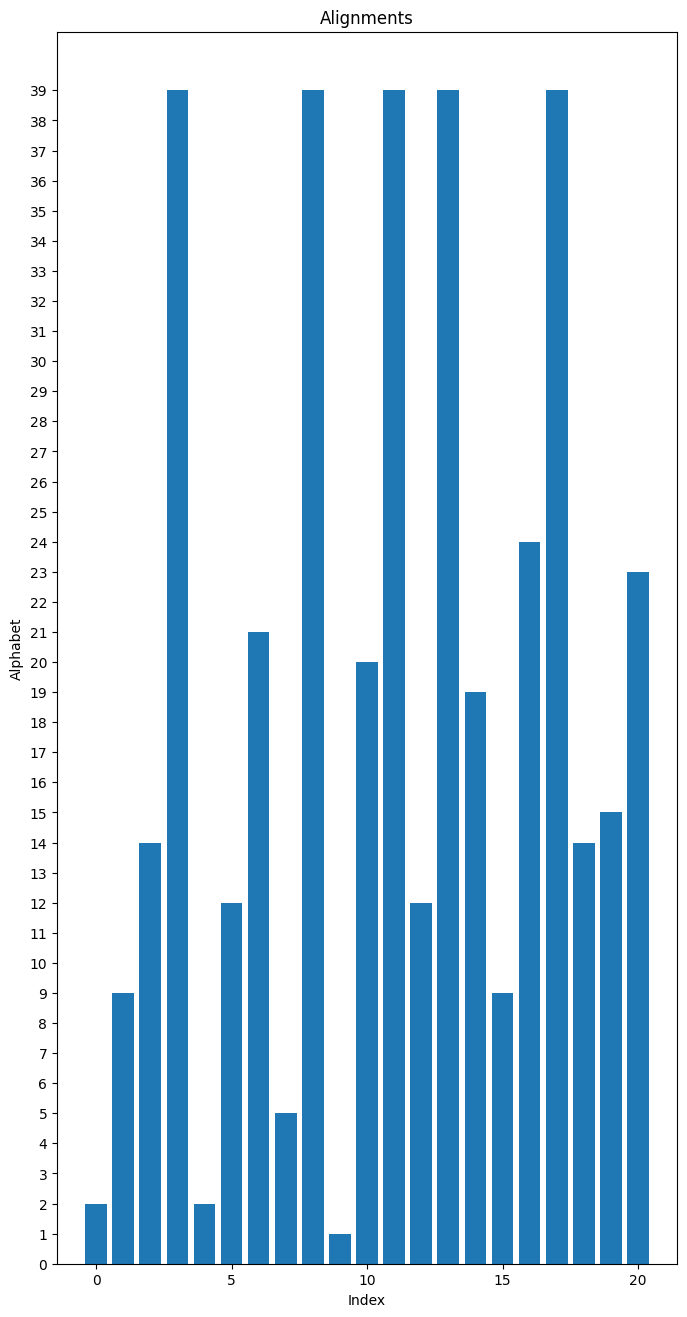

In [8]:
frames, alignments = load_data(tf.convert_to_tensor('.\\data\\alignments\\s1\\bbal6n.align'))

plt.title('First Frame')
plt.imshow(frames[0])
plt.show()

print(f'No of frames: { len(frames) }')

plt.figure(figsize = (8, 16))
plt.title('Alignments')
plt.bar(x = range(len(alignments.numpy())), height = alignments.numpy())
plt.ylabel('Alphabet')
plt.yticks(range(np.max(alignments.numpy()) + 1))
plt.xlabel('Index')
plt.show()

# Pipelining

In [12]:
data = create_pipeline()
data


<PrefetchDataset element_spec=(TensorSpec(shape=(None, 75, None, None, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 40), dtype=tf.int64, name=None))>

In [13]:
test_data = create_pipeline()

In [14]:
test_iter = test_data.as_numpy_iterator()

In [15]:
val = test_iter.next()
val[0]

array([[[[[1.919826  ],
          [1.9553784 ],
          [1.9909307 ],
          ...,
          [8.497008  ],
          [8.781426  ],
          [8.816978  ]],

         [[1.8487214 ],
          [1.8842738 ],
          [1.919826  ],
          ...,
          [0.03555233],
          [0.35552335],
          [0.35552335]],

         [[1.7776167 ],
          [1.8487214 ],
          [1.8487214 ],
          ...,
          [0.10665701],
          [0.46218035],
          [0.46218035]],

         ...,

         [[1.1732271 ],
          [1.2443317 ],
          [9.0302925 ],
          ...,
          [6.079449  ],
          [6.5060773 ],
          [7.0393624 ]],

         [[1.0310177 ],
          [1.06657   ],
          [9.0302925 ],
          ...,
          [6.0083447 ],
          [6.292763  ],
          [6.897153  ]],

         [[0.746599  ],
          [0.60438967],
          [8.745874  ],
          ...,
          [5.866135  ],
          [6.1505537 ],
          [6.790496  ]]],


        [[[1.9198

In [19]:
val[0][1]

array([[[[1.968912],
         [2.05095 ],
         [1.927893],
         ...,
         [1.025475],
         [1.025475],
         [0.451209]],

        [[1.927893],
         [2.091969],
         [2.009931],
         ...,
         [1.148532],
         [1.025475],
         [0.902418]],

        [[1.927893],
         [2.05095 ],
         [1.968912],
         ...,
         [0.984456],
         [1.025475],
         [1.23057 ]],

        ...,

        [[0.82038 ],
         [0.779361],
         [0.41019 ],
         ...,
         [0.205095],
         [0.164076],
         [0.164076]],

        [[0.738342],
         [0.779361],
         [0.492228],
         ...,
         [0.123057],
         [0.164076],
         [0.164076]],

        [[0.738342],
         [0.82038 ],
         [0.328152],
         ...,
         [0.123057],
         [0.164076],
         [0.164076]]],


       [[[2.05095 ],
         [2.091969],
         [1.968912],
         ...,
         [1.025475],
         [0.902418],
         [0.7

In [24]:
animation_frames = val[0][1]

# Convert float32 to uint8 and scale pixel values to [0, 255]
scaled_frames = (255 * (animation_frames - animation_frames.min()) / (animation_frames.max() - animation_frames.min())).astype(np.uint8)

reshaped_frames = np.squeeze(scaled_frames, axis=-1)

imageio.mimsave("./gifs/animation.gif", reshaped_frames, duration = 100)

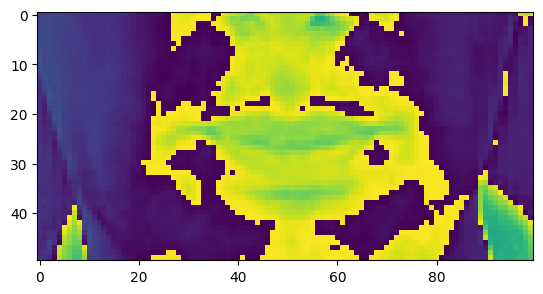

In [33]:
plt.imshow(val[0][0][32])
plt.show()